###  Basic classification: Classify images of clothing

In [32]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


In [33]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
print("train shape:",train_images.shape)
print("train labels length:", len(train_labels))

train shape: (60000, 28, 28)
train labels length: 60000


In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
print("test shape:",test_images.shape)
print("test labels length:", len(test_labels))

test shape: (10000, 28, 28)
test labels length: 10000


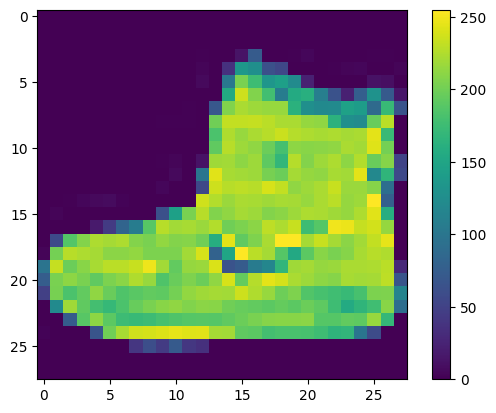

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

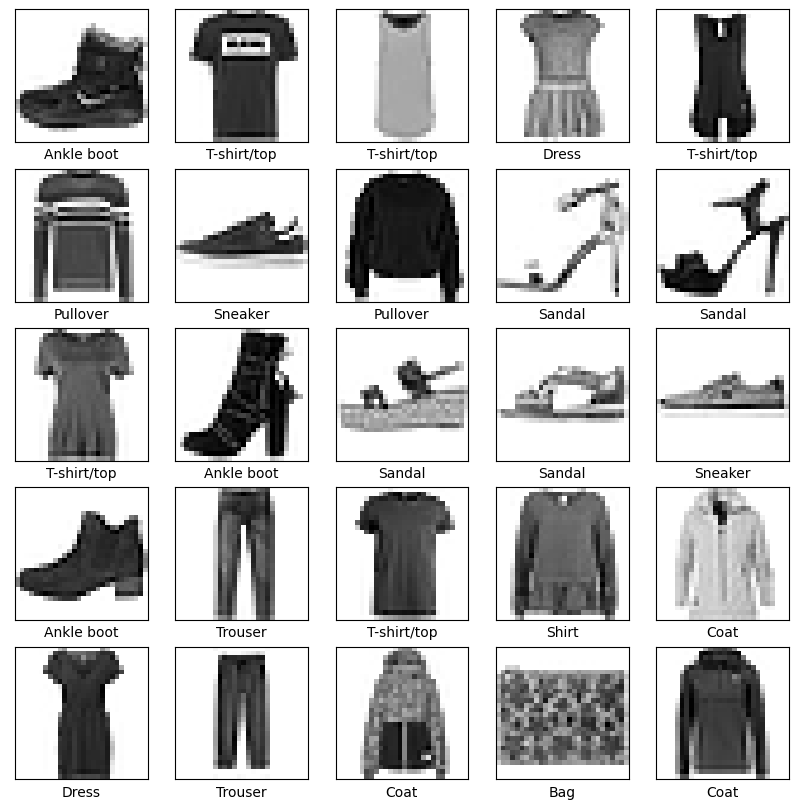

In [37]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4963 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3766 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3371 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3113 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2966 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2787 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2660 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2559 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2464 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.237

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3504 - accuracy: 0.8744 - 283ms/epoch - 905us/step

Test accuracy: 0.8744000196456909


In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 591us/step


In [19]:
print(predictions[0])
print(np.argmax(predictions[0]))

[4.6765775e-10 1.5191215e-08 3.3622456e-09 1.4943007e-08 3.7861863e-08
 3.4576267e-05 4.8073474e-09 2.3715517e-03 4.1780486e-06 9.9758971e-01]
9


In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


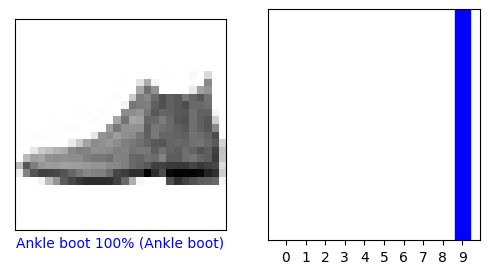

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


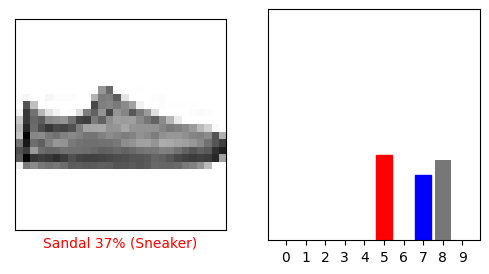

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


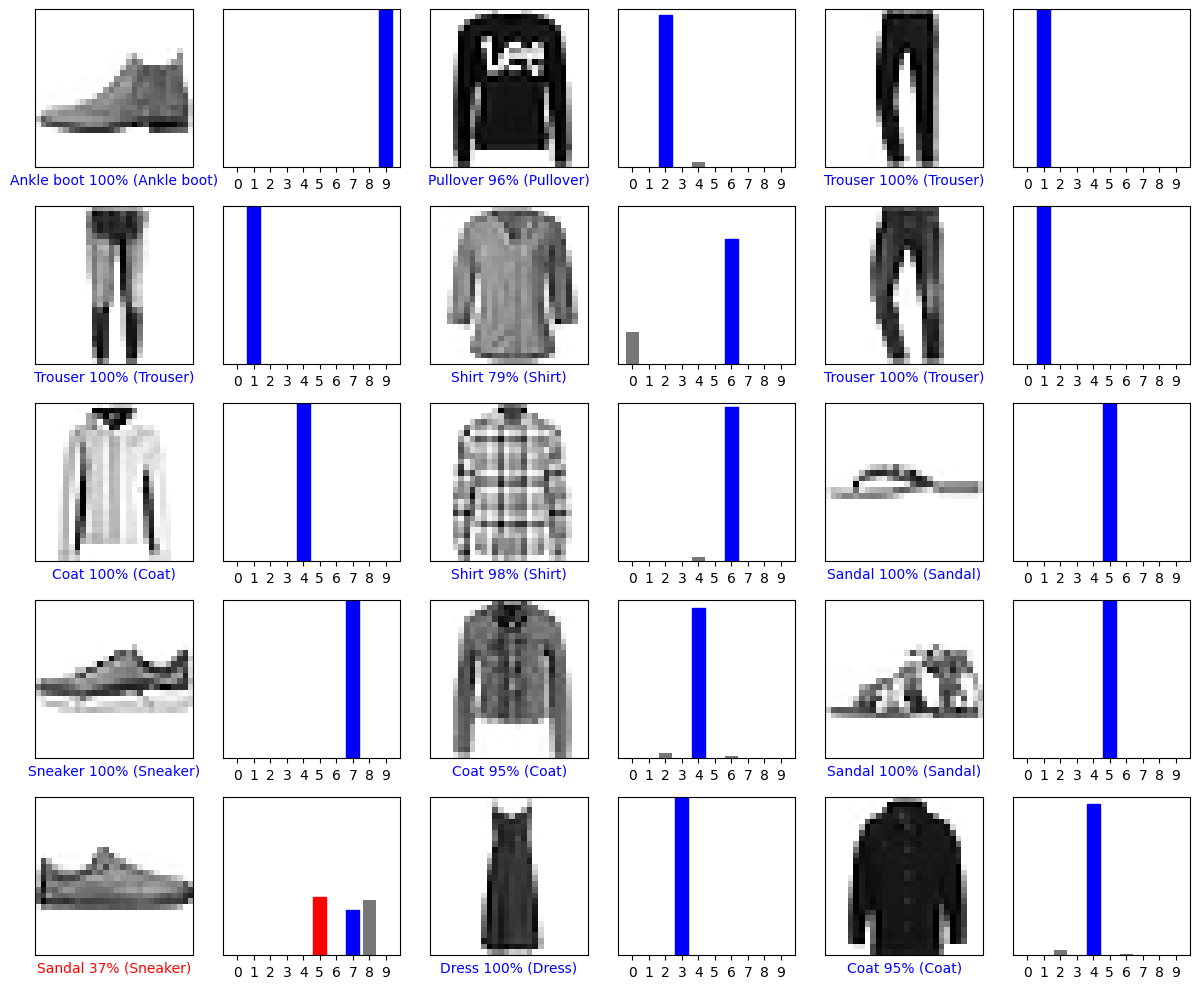

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 11ms/step
[[1.8321544e-04 2.1557863e-16 9.6465755e-01 8.9026636e-10 3.3893179e-02
  1.6335841e-18 1.2660547e-03 2.9207785e-18 8.0331514e-10 5.1841908e-13]]


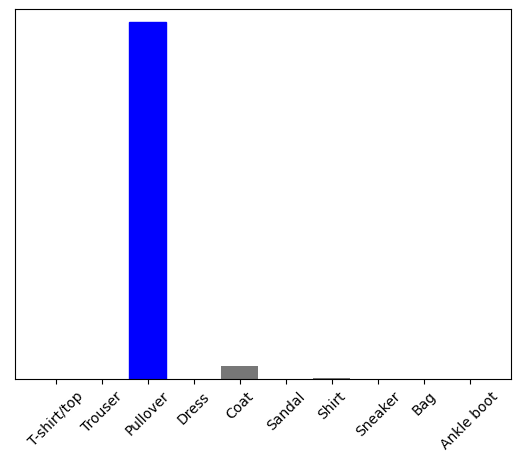

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [29]:
np.argmax(predictions_single[0])


2